In [2]:
# Question 1

# load human and fruitfly protein sequences
import alg_application4_provided as app4

human_seq = app4.read_protein(app4.HUMAN_EYELESS_URL)
fly_seq = app4.read_protein(app4.FRUITFLY_EYELESS_URL)
print("human_seq = ", human_seq)
print()
print("fly_seq = ", fly_seq)

# Load the scoring matrix PAM50
scoring_matrix = app4.read_scoring_matrix(app4.PAM50_URL)
# print()
# print("scoring_matrix = ", scoring_matrix)


human_seq =  MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEKQQMGADGMYDKLRMLNGQTGSWGTRPGWYPGTSVPGQPTQDGCQQQEGGGENTNSISSNGEDSDEAQMRLQLKRKLQRNRTSFTQEQIEALEKEFERTHYPDVFARERLAAKIDLPEARIQVWFSNRRAKWRREEKLRNQRRQASNTPSHIPISSSFSTSVYQPIPQPTTPVSSFTSGSMLGRTDTALTNTYSALPPMPSFTMANNLPMQPPVPSQTSSYSCMLPTSPSVNGRSYDTYTPPHMQTHMNSQPMGTSGTTSTGLISPGVSVPVQVPGSEPDMSQYWPRLQ

fly_seq =  MRNLPCLGTAGGSGLGGIAGKPSPTMEAVEASTASHPHSTSSYFATTYYHLTDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQSTGSGSSSTSAGNSISAKVSVSIGGNVSNVASGSRGTLSSSTDLMQTATPLNSSESGGASNSGEGSEQEAIYEKLRLLNTQHAAGPGPLEPARAAPLVGQSPNHLGTRSSHPQLVHGNHQALQQHQQQSWPPRHYSGSWYPTSLSEIPISSAPNIASVTAYASGPSLAHSLSPPNDIESLASIGHQRNCPVATEDIHLKKELDGHQSDETGSGEGENSNGGASNIGNTEDDQARLILKRKLQRNRTSFTNDQIDSLEKEFERTHYPDVFARERLAGKIGLPEARIQVWFSNRRAKWRREEKLRNQRRTPNSTGASATSSSTSATASLTDSPNSLSACSSLLSGSAGGPSVSTINGLSSPSTLS

In [5]:
# compute local alignments of the sequences
import alg_project4_solution as proj4

global_flag = False
alignment_matrix = proj4.compute_alignment_matrix(human_seq, fly_seq, scoring_matrix, global_flag)
score, align_x, align_y = proj4.compute_local_alignment(human_seq, fly_seq, scoring_matrix, alignment_matrix)

print("score = ", score)
print("align_x = ", align_x)
print("align_y = ", align_y)


score =  875
align_x =  HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ
align_y =  HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ


In [21]:
# Question 2

# Load the file ConsensusPAXDomain
pax_seq = app4.read_protein(app4.CONSENSUS_PAX_URL)
print(len(pax_seq))

print(pax_seq)
print()

# Delete any dashes '-' present in the sequence of the local alignments
align_x_nd = align_x.replace('-','')
align_y_nd = align_y.replace('-','')
print(len(align_x))
print(len(align_x_nd))
print(len(align_y))
print(len(align_y_nd))
print()

# Compute the global alignment of this dash-less sequence with the ConsensusPAXDomain sequence.

# global alignment of human with pax
global_flag = True
alignment_matrix2h = proj4.compute_alignment_matrix(align_x_nd, pax_seq, scoring_matrix, global_flag)
score2h, align_human, align_pax_human = proj4.compute_global_alignment(align_x_nd, pax_seq, scoring_matrix, alignment_matrix2h)
print("score = ", score2h)
print(len(align_human))
print("align_human = ", align_human)
print(len(align_pax_human))
print("align_pax_human = ", align_pax_human)
print()

# global alignment of fruitfly with pax
alignment_matrix2f = proj4.compute_alignment_matrix(align_y_nd, pax_seq, scoring_matrix, global_flag)
score2f, align_fly, align_pax_fly = proj4.compute_global_alignment(align_y_nd, pax_seq, scoring_matrix, alignment_matrix2f)
print("score = ", score2f)
print(len(align_fly))
print("align_fly = ", align_fly)
print(len(align_pax_fly))
print("align_pax_fly = ", align_pax_fly)

# Compare corresponding elements of these two globally-aligned sequences (local vs. consensus) and compute the percentage of 
# elements in these two sequences that agree.

# count agreement in human and pax sequences
human_agree = 0
for idx in range(len(align_human)):
    if align_human[idx] == align_pax_human[idx]:
        human_agree += 1

print()
print("human/pax agree/total % = ", human_agree/len(align_human)*100.0, "%")

# count agreement in fruitfly and pax sequences
fly_agree = 0
for idx in range(len(align_fly)):
    if align_fly[idx] == align_pax_fly[idx]:
        fly_agree += 1

print()
print("fly/pax agree/total % = ", fly_agree/len(align_fly)*100.0, "%")

125
GHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIR

133
132
133
133

score =  613
133
align_human =  -HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEKQQ
133
align_pax_human =  GHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIR--------

score =  586
134
align_fly =  -HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ
134
align_pax_fly =  GHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIR---------

human/pax agree/total % =  72.93233082706767 %

fly/pax agree/total % =  70.1492537313433 %


### Question 3

The same level of agreement would not be likely if we compared two random sequences of amino acids of length similar to that of HumanEyelessProtein and FruitflyEyelessProtein. If we are comparing two random sequences, this implies that we may not be taking into account the prior probability of any particular amino acid appearing at a particular location in the protein. Hence, every feasible sequence would be considered equally likely. If we assume that there are 23 amino acids and look at a random sequence of length 130 without restriction, then there would be 23^130 possible sequences. Of course, not every sequence is feasible but the number of possible sequences will still be astonishingly large. This means that the probability of getting 70% agreement on two random sequences of length 130 is extremely low.

In [25]:
# Question 4
import random

def generate_null_distribution(seq_x,seq_y,scoring_matrix,num_trials):
    """
    This function should return a dictionary scoring_distribution that represents an
    un-normalized distribution generated by performing the following process num_trials times:
    * Generate a random permutation rand_y of the sequence seq_y using random.shuffle()
    * Compute the maximum value score for the local alignment of seq_x and rand_y using the score
    matrix scoring_matrix
    * Increment the entry score in the dictionary scoring_distribution by one
    """
    scoring_distribution = {}
    
    for _ in range(num_trials):
        
        # generate a random permutation rand_y of the sequence seq_y using random.shuffle().
        rand_y = list(seq_y)
        random.shuffle(rand_y)
        
        # compute maximum value score for the local alignment of seq_x and rand_y using scoring_matrix
        global_flag = False
        alignment_matrix = proj4.compute_alignment_matrix(seq_x, rand_y, scoring_matrix, global_flag)
        score, align_x, align_y = proj4.compute_local_alignment(seq_x, rand_y, scoring_matrix, alignment_matrix)
        
        if score in scoring_distribution:
            scoring_distribution[score] += 1
        else:
            scoring_distribution[score] = 1
        
    return scoring_distribution

num_trials = 1000
scoring_distribution = generate_null_distribution(human_seq,fly_seq,scoring_matrix,num_trials)

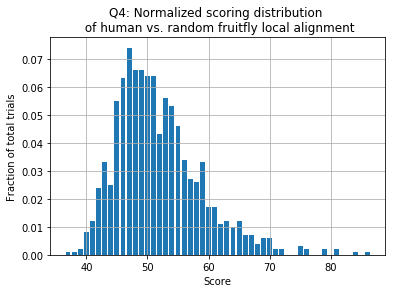

In [48]:
# Plot the scoring_distribution in a bar plot
import matplotlib.pyplot as plt
import numpy as np

plt.xlabel('Score')
plt.ylabel('Fraction of total trials')
plt.title('Q4: Normalized scoring distribution \n of human vs. random fruitfly local alignment')
plt.bar(scoring_distribution.keys(), np.array(list(scoring_distribution.values()))/num_trials)
plt.grid()
plt.savefig('loc_align_score_distribution_q4_proj4_at2.png')
plt.show()

In [39]:
# Question 5

# Calculate mean of the scores

score_sum = 0
for key in scoring_distribution:
    score_sum += key*scoring_distribution[key]

score_mean = score_sum/num_trials
print("score mean = ", score_mean)

# Calculate the standard deviation of the scores

score_variance_sum = 0
for key in scoring_distribution:
    score_variance_sum += scoring_distribution[key]*(key - score_mean)**2
    
score_stdev = np.sqrt(score_variance_sum/num_trials)
print("score std. dev. = ", score_stdev)

# calculate the z-score
# the score of the local alignment of human_seq and fly_seq was 875

z_score = (875-score_mean)/score_stdev
print("z-score = ", z_score)

score mean =  51.808
score std. dev. =  6.996508843701979
z-score =  117.65753726460443


### Question 6

Based on my z-score of 117.657, I would hypothesize that the score resulting from the local alignment of HumanEyelessProtein and the FruitflyEyelessProtein was not due to chance. The z-score of 117.657 indicates that an alignment score of 875 is 117.657 standard deviations above the mean score, which means it is extremely unlikely that it occurred randomly.

For comparison, the odds of winning the Mega Millions lottery is about 1 in 300,000,000. In a normal distribution, the odds of being outside of 6 standard deviations from the mean is 1 in 506,797,346. The alignment score of 875 is 117.657 standard deviations from the mean. Therefore, it is much more likely to win the lottery than the similarity between the human eyeless protein and the fruitfly eyeless protein being due to chance.

### Question 7

The edit distance, $d_e$, for two strings $x$ and $y$ can be expressed in terms of lengths of the two strings and their corresponding similarity score as follows:
$$
d_e=|x|+|y|-score(x,y)
$$
where $score(x,y)$ is the score returned by the global alignment of these two strings using a very simple scoring matrix that can be computed using **build_scoring_matrix**.

Let's consider three cases to solve for the values of `diag_score`, `off_diag_score`, and `dash_score`.

### Case 1
$x=a$ and $y=a$ so $d_e=0$. Then we have
$$
d_e = 1 + 1 - score(x,y) = 0\\
\text{diag_score}=score(x,y) = 2
$$

### Case 2
$x=a$ and $y=-$ so $d_e=1$. Then we have
$$
d_e = 1 + 0 - score(x,y) = 1\\
\text{dash_score}=score(x,y) = 0
$$

### Case 3
$x=a$ and $y=b$ so $d_e=1$. Then we have
$$
d_e = 1 + 1 - score(x,y) = 1\\
\text{off_diag_score}=score(x,y) = 1
$$

In [49]:
# Question 8

# Load the word list
word_list = app4.read_words(app4.WORD_LIST_URL)

def check_spelling(checked_word, dist, word_list):
    """
    Iterates through word_list and returns the set of all words that are
    within edit distance dist of the string checked_word
    """
    close_words = []
    
    diag_score = 2
    off_diag_score = 1
    dash_score = 0
    global_flag = False
    
    for word in word_list:
        alphabet = set(word + checked_word)
        scoring_matrix = proj4.build_scoring_matrix(alphabet, diag_score, off_diag_score, dash_score)
        
#         print(word)
#         print()
#         print(scoring_matrix)
#         print()
        
        alignment_matrix = proj4.compute_alignment_matrix(checked_word, word, scoring_matrix, global_flag)
        
#         print(alignment_matrix)
#         print()
        score, align_x, align_y = proj4.compute_local_alignment(checked_word, word, scoring_matrix, alignment_matrix)
        
#         print(score)
#         print(align_x)
#         print(align_y)
        
        edit_distance = len(checked_word) + len(word) - score
        if edit_distance <= dist:
            close_words.append(word)
            
    return set(close_words)

humble_words = check_spelling("humble", 1, word_list)
print(humble_words)
firefly_words = check_spelling("firefly", 2, word_list)
print()
print(firefly_words)

Loaded a dictionary with 79340 words
{'humbler', 'fumble', 'mumble', 'humbles', 'rumble', 'humbly', 'jumble', 'bumble', 'tumble', 'humbled', 'humble'}

{'firstly', 'liefly', 'refly', 'firmly', 'fireclay', 'finely', 'tiredly', 'firefly', 'freely', 'fixedly', 'direly'}


### Question 9

No answer.